# ASL Keypoint Classification

In [1]:
import cv2
import mediapipe as mp
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [6]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import sys
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
#import shutilju
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.data import Dataset

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

**Neke bitne funkcije se nalaze unutar posebnog fajla**

In [8]:
%run ../Funkcije.ipynb

### Učitavanje keypoint baze podataka

In [9]:
data_path = r'../dataset/Synthetic ASL Alphabet - keypoints/' 
train_x, train_y, test_x, test_y, valid_x, valid_y = load_keypoint_database(data_path)

In [10]:
NUM_OF_CLASSES = 24

### Arhitektura

In [30]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, verbose=1)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 3,)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(63, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(NUM_OF_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 63)                4032      
                                                                 
 dropout_3 (Dropout)         (None, 63)                0         
                                                                 
 dense_10 (Dense)            (None, 42)                2688      
                                                                 
 dense_11 (Dense)            (None, 24)                1032      
                                                                 
Total params: 7,752
Trainable params: 7,752
Non-trainable params: 0
_________________________________________________________________


### Treniranje

In [32]:
history = model.fit(
                    train_x,
                    train_y,
                    epochs=400,
                    batch_size=100,
                    validation_data=(valid_x, valid_y),
                    callbacks=[es_callback]
)

Epoch 1/400
120/120 [==============================] - 1s 5ms/step - loss: 3.0671 - accuracy: 0.1004 - val_loss: 2.7989 - val_accuracy: 0.2642
Epoch 2/400
120/120 [==============================] - 0s 4ms/step - loss: 2.5688 - accuracy: 0.2313 - val_loss: 2.0288 - val_accuracy: 0.5133
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 2.0660 - accuracy: 0.3606 - val_loss: 1.5363 - val_accuracy: 0.6717
Epoch 4/400
120/120 [==============================] - 0s 4ms/step - loss: 1.7997 - accuracy: 0.4484 - val_loss: 1.2788 - val_accuracy: 0.7717
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 1.6399 - accuracy: 0.5010 - val_loss: 1.1189 - val_accuracy: 0.8058
Epoch 6/400
120/120 [==============================] - 0s 4ms/step - loss: 1.5203 - accuracy: 0.5380 - val_loss: 0.9811 - val_accuracy: 0.8283
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 1.4156 - accuracy: 0.5775 - val_loss: 0.8873 - val_accuracy: 0.8175

In [33]:
print("VALIDATION LOSS = ", history.history['val_loss'][-1])
print("VALIDATION ACC  = ", history.history['val_accuracy'][-1])

VALIDATION LOSS =  0.21071767807006836
VALIDATION ACC  =  0.9608333110809326


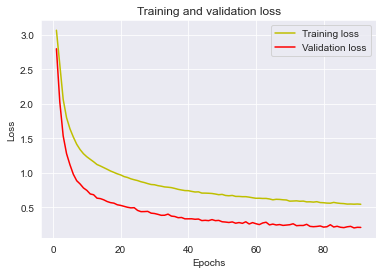

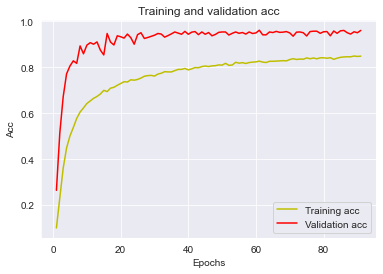

In [34]:
plot_loss_and_acc(history)

38/38 [==============================] - 0s 2ms/step


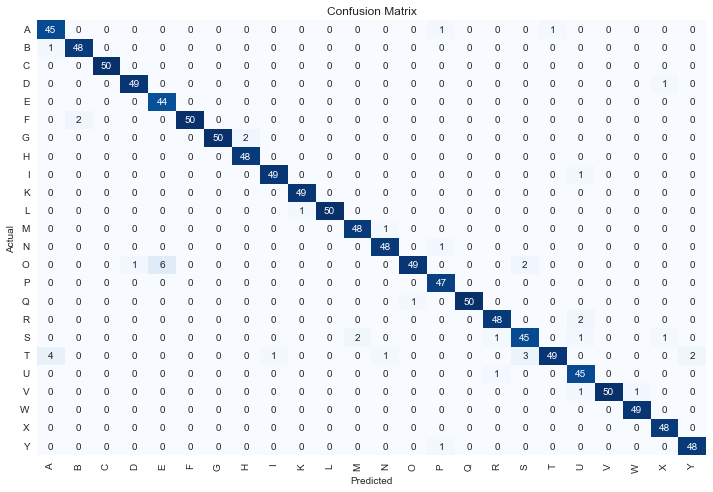

In [35]:
show_heatmap(model, test_x, test_y)

### Čuvanje rezultata i modela

In [36]:
METOD_NUM = 1
EKSP_NUM = 10

In [37]:
zapisi_rezultate(METOD_NUM = METOD_NUM,
                 EKSP_NUM = EKSP_NUM,
                 acc = history.history['accuracy'],
                 loss = history.history['loss'],
                 val_acc = history.history['val_accuracy'],
                 val_loss = history.history['val_loss'],
                 model = model)

model was saved as  ./Merenja/eksp_10/model_eksp_10.h5


In [38]:
len(history.history['val_accuracy'])

91

In [1]:
path = r'D:/Projekat 2022/Metod 1 - ASL_KC/acc.txt'
#path = os.path.join(path)

with open(path) as f:
    for line in f:
        l = line.split('a')
        print(l[0])
        

0.07999999821186066
0.09600000083446503
0.16200000047683716
0.1899999976158142
0.24400000274181366
0.32899999618530273
0.37299999594688416
0.4269999861717224
0.4309999942779541
0.40299999713897705
0.4790000021457672
0.46000000834465027
0.48500001430511475
0.5099999904632568
0.5210000276565552
0.527999997138977
0.503000020980835
0.5460000038146973
0.5450000166893005
0.5440000295639038
0.5809999704360962
0.5540000200271606
0.6000000238418579
0.5929999947547913
0.6190000176429749
0.609000027179718
0.6140000224113464
0.6200000047683716
0.6439999938011169
0.6250000000000000
0.6510000228881836
0.6539999842643738
0.6480000019073486
0.6679999828338623
0.6669999957084656
0.6629999876022339
0.6830000281333923
0.6679999828338623
0.6990000009536743
0.6779999732971191
0.6930000185966492
0.7089999914169312
0.6919999718666077
0.7089999914169312
0.6899999976158142
0.6959999799728394
0.7120000123977661
0.6880000233650208
0.7170000076293945
0.7260000109672546
0.7129999995231628
0.7149999737739563
0.7139

In [2]:
directory = r'D:/Projekat 2022/Metoda 0 - Extended MNIST Network/Merenja/'
files = ['acc.txt', 'loss.txt', 'val_acc.txt', 'val_loss.txt']
METOD_NUM = 1


for eksp_num in range(1, 3):
    eksp_path = r'eksp_' + str(eksp_num) + '/'
    for file in files:
        path = os.path.join(directory, eksp_path, file)
        data = []
        with open(path) as file:
            for line in file:
                data_point = line.split('a')[0]
                data_point = data_point.split('l')[0]
                data_point = data_point.split('v')[0]
                data.append(data_point)

        textfile = open(path, "w")

        #Brise sve iz fajla
        with textfile as file:
            pass

        textfile = open(path, "w")

        for element in data:
            textfile.write(element + "\n")
        textfile.close()

    print("Written eksp_" + str(eksp_num))
        


FileNotFoundError: [Errno 2] No such file or directory: 'D:/Projekat 2022/Metoda 0 - Extended MNIST Network/Merenja/eksp_1/acc.txt'